slope: 0.118351    intercept: 0.040411
Correlation Coefficients: 0.841741    p-value: 0.000000
explained_variance:  0.7085
mean_squared_log_error:  0.0012
r2:  0.7085
MAE:  0.033
MSE:  0.002
RMSE:  0.0449


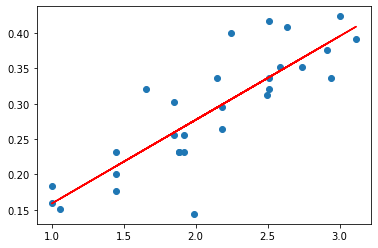

In [6]:
import matplotlib.pyplot as plt
import math
import numpy
numpy.set_printoptions(precision =2)
import scipy.stats as stats
import statsmodels.api as sm

import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
import os
#### During the course, we derived a model where, for a target of size W that is D away, the time required to select it is 
#### MT = b log_2 (1 + D/W). We are going to use this to model keyboard typing with a single finger.
########################### Modeling keyboard

## Define our keyboard

line1 = 'qwertyuiop'
line2 = 'asdfghjkl'
line3 = 'zxcvbnm'


### Define a keyboard as a list of keys. Each key also mentions its position in the keyboard (line number, column number)
keyboard  = [(i, (0,ni)) for ni,i in enumerate(line1)] + [(i, (1,ni)) for ni,i in enumerate(line2)] + [(i, (2,ni)) for ni,i in enumerate(line3)]
# There are total 26 keys

### Define empty matrices to hold the results
ids = numpy.zeros((26,26))
Ds = numpy.zeros((26,26))
W = 1


alphabet = line1 + line2 + line3

### Get Ids for each key combination
for ns,keystart in enumerate(alphabet):
    for ne, keyend in enumerate(alphabet):
        xs,ys, xe,ye = keyboard[ns][1][1] + 2/5*keyboard[ns][1][0], keyboard[ns][1][0], keyboard[ne][1][1] + 2/5*keyboard[ne][1][0], keyboard[ne][1][0]
        ## Compute euclidian distance between the startkey and endkey
        D = numpy.sqrt(abs((xs-xe)**2 + (ys-ye)**2))
        Ds[ns,ne] = D
        ## Use Fitts' law formula
        ids[ns,ne] = numpy.log2(1 + D/W)

### This function can be used to print out an array in a form suited for a LaTex table. 
### You can adapt it to print out the array in a different format if needed.

def bmatrix(a):
    text = r'$\left[\begin{array}{*{'
    text += str(len(a[0]))
    text += r'}c}'
    text += '\n'
    for x in range(len(a)):
        for y in range(len(a[x])):
            text += '{:.2f}'.format(a[x][y])
            text += r' & '
        text = text[:-2]
        text += r'\\'
        text += '\n'
    text += r'\end{array}\right]$'
    print(text)

#bmatrix(ids)
################################## Estimating Model parameters



## This function opens the file filename, and reads the startkey, endkey, and duration of each typing stroke


##### load the array of ID using numpy.load() if you didn't succeed in creating it
ids = numpy.load('id.npy')

#### Use this function to open the file keystrokes.csv. It returns the list of ID and MT's
### Inputs: filename: name of the file you want to open
### ids: array of IDs for the keyboard
def get_keystrokes(filename, ids):
    ID, MT = [], []
    with open(filename, 'r') as _file:
        startime = 0
        for n,line in enumerate(_file):
            #print(n,line)
            try:
                startkey, stopkey, time = line.split(",")
                #print(startkey, stopkey, time)
                time = float(time.rsplit('\n')[0])
                # if startkey == 'None':
                if n == 0:
                    startime = time
                    continue
                startkey = startkey.split("'")[1]
                stopkey = stopkey.split("'")[1]
                if startkey not in alphabet or stopkey not in alphabet:
                    continue
                ns = alphabet.index(startkey)
                ne = alphabet.index(stopkey)
                mt = time - startime
                MT.append(mt)
                ID.append(ids[ns,ne])
                startime = time
            except IndexError:
                pass
    return ID,MT



### Complete this function to estimate the parameters of Fitts' law

### TODO: complete this function to estimate the slope and intercept parameters. 
### Report Goodness of fits for Fitts' model, as well as a report on the confidence of the estimated parameters. 
### You can use the scipy.stats or statsmodels libraries, or any other tool you prefer.
  
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(numpy.sqrt(mse),4))    
    
def analyse_keystrokes(ID,MT,ax):
    arrID = numpy.array(ID)
    arrMT = numpy.array(MT)
    
    ax.plot(ID,MT,'o', label = 'original data')
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(arrID, arrMT)
    arrMT_pred = intercept + slope * arrID
    print("slope: %f    intercept: %f" % (slope, intercept))
    print("Correlation Coefficients: %f    p-value: %f" % (r_value, p_value))
    regression_results(arrMT,arrMT_pred)
    ax.plot(arrID, arrMT_pred, 'r', label = 'fitted line')
    
    return

###TODO: use the get_keystrokes fucntion to get the IDs associated MT for each keystroke.
ID,MT = get_keystrokes('keystrokes.csv', ids) 

#### Show how well Fitts' model fits: graphical representation, a goodness of fit of choice, and the uncertainty with regards to estimated parameters
fig = plt.figure()
ax = fig.add_subplot(111) # Can be replaced by 'fig, ax = plt.subplots(111)'

####TODO: finish and use the analyse_keystrokes function to fit and plot Fitts' model.
analyse_keystrokes(ID,MT,ax)

plt.show()

# Done until here

Average time needed 0.9999165686462256


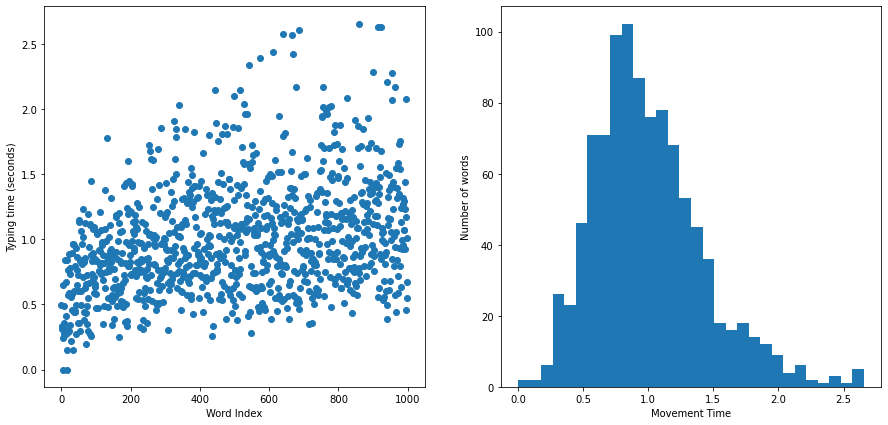

In [8]:
slope = 0.12
intercept = 0.03

with open("most_common_words.txt", 'r') as _file:
    T = []
    for nline, line in enumerate(_file):
        t = 0
        line = line[:-1]
        #print(line, len(line))
        for i in range(0, len(line)-1):
            try:
                ns = alphabet.index(line[i])
                ne = alphabet.index(line[i+1])
                id = ids[ns,ne]
                t += intercept + slope * id
            except ValueError:
                pass
        T.append(t)

print("Average time needed", numpy.mean(T))
#TODO: compute the average typing time from the list of typing times T. You can use e.g. numpy's mean function
#print(numpy.mean(T))

fig = plt.figure(figsize=[15,7])

ax = fig.add_subplot(121)
axhist = fig.add_subplot(122)

ax.plot(range(0,len(T)), T, 'o')
ax.set_ylabel("Typing time (seconds)")
ax.set_xlabel("Word Index")
###TODO: Plot the histogram of the typing times (use plt.hist() function )
axhist.hist(T, bins=30) 
axhist.set_xlabel('Movement Time') #TODO
axhist.set_ylabel('Number of words') #TODO
plt.show()
plt.close()




# Question 5

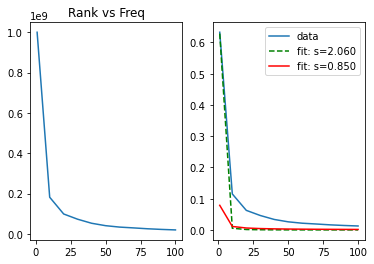

In [16]:
from scipy.optimize import curve_fit
N = 1000
frequency = [1e9, 182e6, 99e6, 73e6, 53e6, 41e6, 34e6, 30e6, 25.7e6, 22.5e6, 20e6]
sum_freq = sum(frequency)
prob = [i/sum_freq for i in frequency]
rank  = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

def zipf(k,s):
    N = 1000
    numerator = 1/(k**s)
    denominator = sum([1/(i**s) for i in range(1,N+1)])
    return numerator / denominator

popt, pcov = curve_fit(zipf,rank, prob)

logfreq = [math.log(f,2) for f in frequency]
logoc = [math.log(o,2) for o in rank]

slope1,in1,rvalue,pval,std = stats.linregress(logoc,logfreq)

###TODO Fit Zipf's model to the frequencey-rank relationship, as explained in the assigment.

## Plot the data + fitted model
fig = plt.figure()
ax = fig.add_subplot(121)
axlog = fig.add_subplot(122)
ax.plot(rank, frequency, '-')
ax.title.set_text("Rank vs Freq")

arr_zipf = [zipf(i, N) for i in rank]
axlog.plot(rank, prob,'-',label="data")
axlog.plot(rank, [zipf(r, *popt) for r in rank], 'g--',
         label='fit: s=%5.3f' % tuple(popt))
axlog.plot(rank, [zipf(r, 0.85) for r in rank], 'r-',
         label='fit: s=%5.3f' % (0.85))
axlog.legend()
#axlog.title.set_text("Rank vs Zipf")

plt.show()

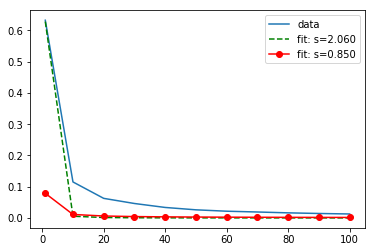

In [4]:
#plt.figure()
plt.plot(rank, prob,'-',label="data")
plt.plot(rank, [zipf(r, *popt) for r in rank], 'g--',
         label='fit: s=%5.3f' % tuple(popt))
plt.plot(rank, [zipf(r, 0.85) for r in rank], 'r-o',
         label='fit: s=%5.3f' % (0.85))
plt.legend()
#axlog.title.set_text("Rank vs Zipf")
plt.figure()
plt.show()

In [5]:
def log_zipf(k,s):
    # infifnite series sum https://www.quora.com/What-is-the-sum-of-the-series-1+-1-2-+-1-3-+-1-4-+-1-5-up-to-infinity-How-can-it-be-calculated
    N = 1000
    Y = 0.5772156649
    Hn = numpy.log2(N) + 1/(2*N) + Y - 1/(12*N**2)
    return -1*s*numpy.log2(k) - numpy.log2(Hn)

def log_zipf2(k,s):
    N = 1000
    numerator = 1/(k**s)
    denominator = sum([1/(i**s) for i in range(1,N+1)])
    return numpy.log(numerator / denominator)


popt, pcov = curve_fit(log_zipf, logoc[1:], logfreq[1:])
popt2, pcov2 = curve_fit(log_zipf2, logoc[1:], logfreq[1:])


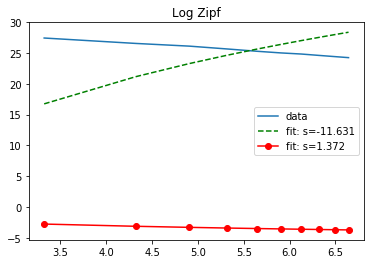

In [6]:
plt.plot(logoc[1:], logfreq[1:],'-',label="data")
#popt = [-1]
plt.plot(logoc[1:], [log_zipf(r, *popt) for r in logoc[1:]], 'g--',
         label='fit: s=%5.3f' % tuple(popt))
#popt2 = [0.85]
plt.plot(logoc[1:], [log_zipf2(r, *popt2) for r in logoc[1:]], 'r-o',
         label='fit: s=%5.3f' % tuple(popt2))

plt.legend()
plt.title("Log Zipf")
plt.figure()
plt.show()

# Curve fitting method

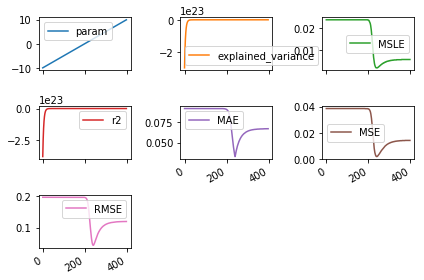

In [7]:
from sklearn.metrics import r2_score
import pandas as pd
def regression_goodness(y_true, y_pred):
    #
    # Return
    # y1: explained_variance
    # y2: mean_squared_log_error
    # y3: r2
    # y4: MAE
    # y5: SME
    # y6: RMSE
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    return (round(explained_variance,4), 
            round(mean_squared_log_error,4),
            round(r2,4),round(mean_absolute_error,4),
            round(mse,4),
            round(numpy.sqrt(mse),4))
            
            
y_true = prob
x = rank
gen = (x for x in range(-1000,1000,5) if x != 0)
row_list = []
r2 = []
for s in gen:
    row = {}
    row["param"] = s/100
    y_pred = [zipf(k,row["param"]) for k in x]
    
    row["explained_variance"],row["MSLE"],row["r2"],row["MAE"],row["MSE"],row["RMSE"] = regression_goodness(y_pred,y_true)
    row_list.append(row)
df = pd.DataFrame(row_list)

axes = df.plot(subplots=True, layout=(3,3))
plt.tight_layout()

#axes.figure(figsize=[20,10])
# for ax in numpy.nditer(axes,flags=["refs_OK"], op_flags=["readwrite"]):
#     ax.xticks(df["param"])

plt.show()


# Question 6

In [11]:
keyboard_2

[('q', (0, 0)),
 ('w', (0, 1)),
 ('e', (0, 2)),
 ('r', (0, 3)),
 ('t', (0, 4)),
 ('y', (1, 0)),
 ('u', (1, 1)),
 ('i', (1, 2)),
 ('o', (1, 3)),
 ('p', (1, 4)),
 ('q', (2, 0)),
 ('s', (2, 1)),
 ('d', (2, 2)),
 ('f', (2, 3)),
 ('g', (2, 4)),
 ('h', (3, 0)),
 ('j', (3, 1)),
 ('k', (3, 2)),
 ('l', (3, 3)),
 ('z', (4, 0)),
 ('x', (4, 1)),
 ('c', (4, 2)),
 ('v', (4, 3)),
 ('b', (4, 4)),
 ('n', (4, 5)),
 ('m', (4, 6))]

keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 0 (0.000000,0.000000)
keystart: 1 (1.000000,0.000000)
keystart: 1 (1.000000,0.000000)
keystart: 1 (1.000000,0.000000)
keystart: 1 (1.000000,0.000000)
keystart: 1 (1.000000,0.000000)
keystart

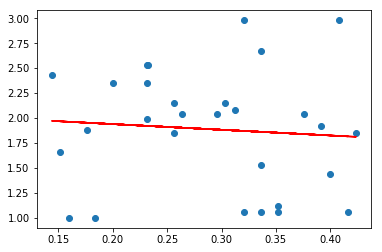

In [10]:
lines = ["qwert","yuiop","qsdfg",'hjkl','zxcvbnm']

### Define a keyboard as a list of keys. Each key also mentions its position in the keyboard (line number, column number)
keyboard_2 = []
for line_nro, line in enumerate(lines):
    keyboard_2 += [(i, (line_nro,ni)) for ni,i in enumerate(line)]

ids_2 = numpy.zeros((26,26))
Ds_2 = numpy.zeros((26,26))
W = 1

for ns,keystart in enumerate(alphabet):
    for ne, keyend in enumerate(alphabet):
        xs,ys, xe,ye = keyboard_2[ns][1][1] + 2/5*keyboard_2[ns][1][0], keyboard_2[ns][1][0], keyboard_2[ne][1][1] + 2/5*keyboard_2[ne][1][0], keyboard_2[ne][1][0]
        ## Compute euclidian distance between the startkey and endkey
        print("keystart: %s (%f,%f)" % (ns, xs, ys))
        #print("keyend: %s (%f,%f)" % (ne, xe, ye))

        D = numpy.sqrt(abs((xs-xe)**2 + (ys-ye)**2))
        Ds_2[ns,ne] = D
        ## Use Fitts' law formula
        ids_2[ns,ne] = numpy.log2(1 + D/W)

        
ID_2,MT_2 = get_keystrokes('keystrokes.csv', ids_2) 

#### Show how well Fitts' model fits: graphical representation, a goodness of fit of choice, and the uncertainty with regards to estimated parameters
fig = plt.figure()
ax = fig.add_subplot(111) # Can be replaced by 'fig, ax = plt.subplots(111)'

####TODO: finish and use the analyse_keystrokes function to fit and plot Fitts' model.
analyse_keystrokes(MT_2,ID_2,ax)

plt.show()


In [ ]:
slope = -0.570005
intercept = 2.053741

with open("mostcommonwords.txt", 'r') as _file:
    T_2 = []
    for nline, line in enumerate(_file):
        t = 0
        line = line[:-1]
        #print(line, len(line))
        for i in range(0, len(line)-1):
            try:
                ns = alphabet.index(line[i])
                ne = alphabet.index(line[i+1])
                id = ids[ns,ne]
                t += intercept + slope * id
            except ValueError:
                pass
        T_2.append(t)

print("Average time needed", numpy.mean(T_2))
# TODO: compute the average typing time from the list of typing times T. You can use e.g. numpy's mean function

fig = plt.figure(figsize=[15,7])

ax = fig.add_subplot(121)
axhist = fig.add_subplot(122)

ax.plot(range(0,len(T_2)), T_2, 'o')
ax.set_ylabel("Typing time (seconds)")
ax.set_xlabel("Word Index")
###TODO: Plot the histogram of the typing times (use plt.hist() function )
axhist.hist(T_2, bins=30) 
axhist.set_xlabel('Movement Time') #TODO
axhist.set_ylabel('Number of words') #TODO
plt.show()
plt.close()

